In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

In [3]:
alzheimer = pd.read_csv("alzheimers_disease_data.csv")
df = alzheimer.copy()
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
df.drop(columns=["PatientID", "DoctorInCharge"], axis=1, inplace=True)

In [6]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [8]:
num_cols = [col for col in df.columns if df[col].nunique() > 10]
# Unique değer sayısı 10'dan fazla olan sayısal sütunları num_cols değişkenine at

cat_cols = df.columns.difference(num_cols).difference(["Diagnosis"]).to_list()
# Geriye kalan sütunları "Diagnosis" hariç olmak üzere kategorik değişken olarak liste şeklinde aktar

In [9]:
cat_cols

['BehavioralProblems',
 'CardiovascularDisease',
 'Confusion',
 'Depression',
 'Diabetes',
 'DifficultyCompletingTasks',
 'Disorientation',
 'EducationLevel',
 'Ethnicity',
 'FamilyHistoryAlzheimers',
 'Forgetfulness',
 'Gender',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'PersonalityChanges',
 'Smoking']

In [10]:
num_cols

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

In [11]:
#normalize the columns
min_max_scaler = MinMaxScaler()
df[num_cols] = min_max_scaler.fit_transform(df[num_cols])

#standardize the columns
standard_scaler = StandardScaler()
df[num_cols] = standard_scaler.fit_transform(df[num_cols])

In [12]:
df[cat_cols] = df[cat_cols].astype("category")
df["Diagnosis"] = df["Diagnosis"].astype("category")

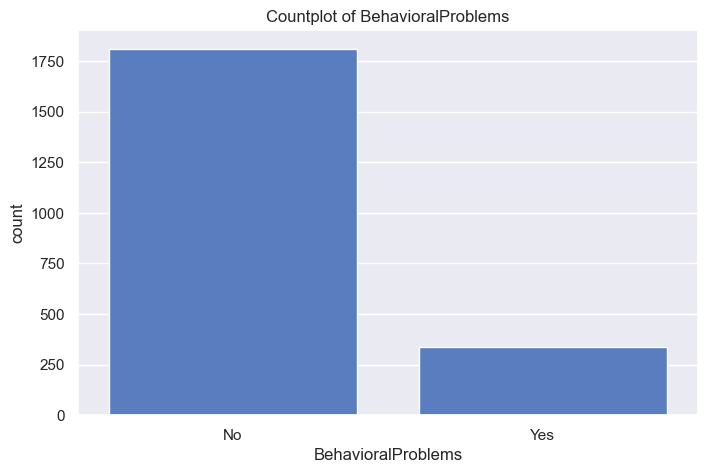

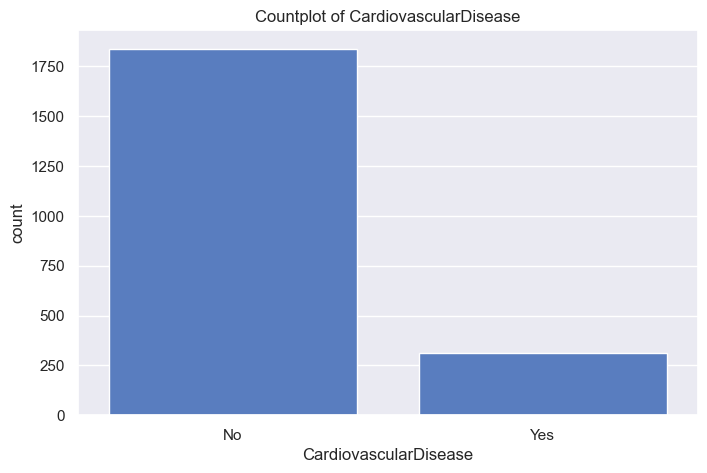

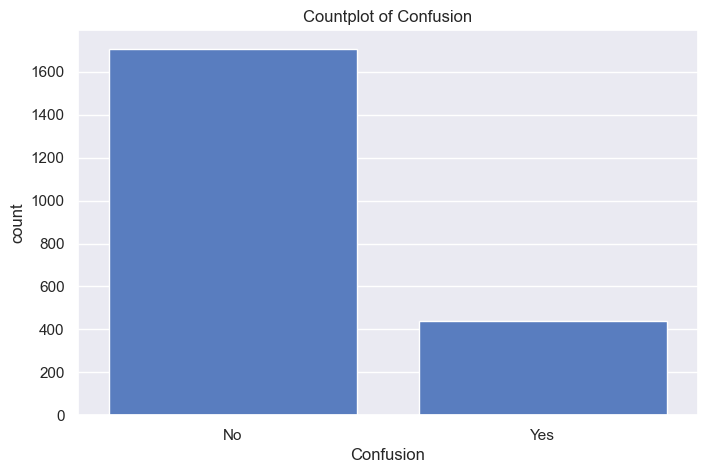

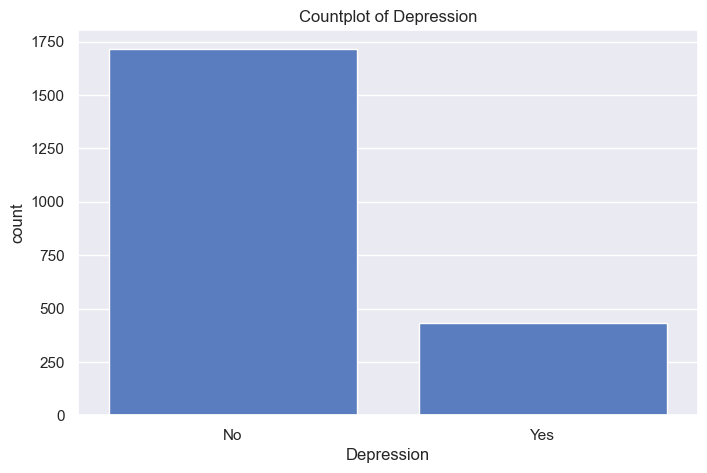

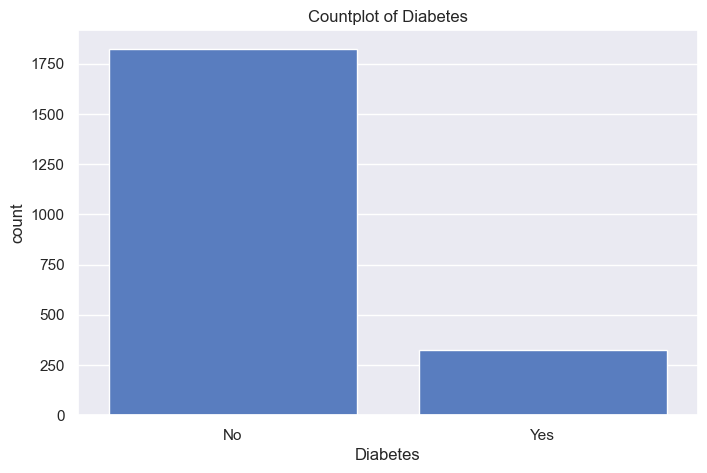

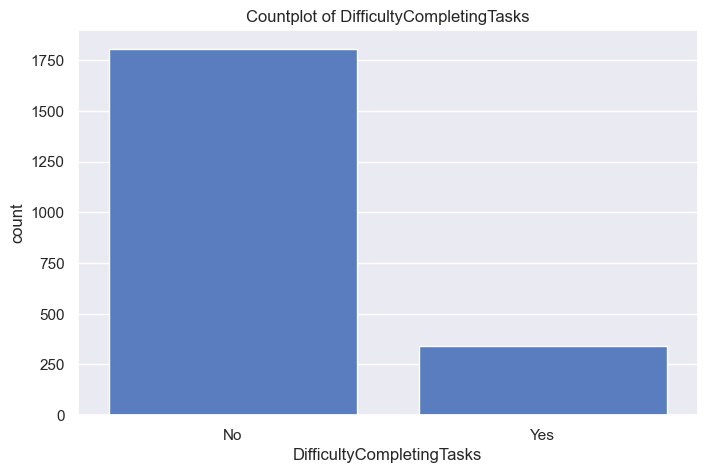

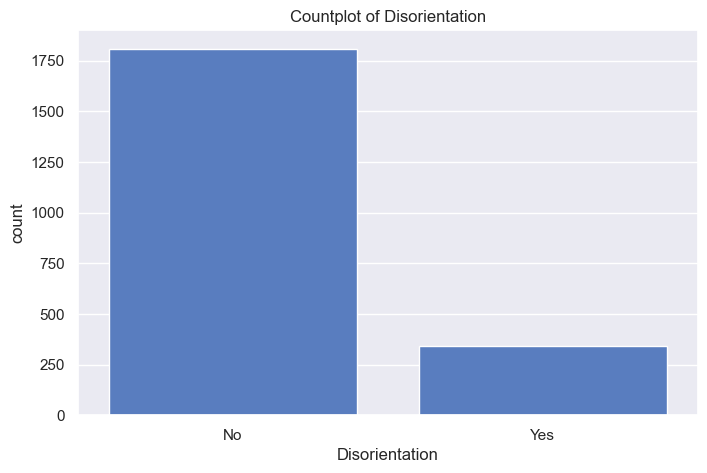

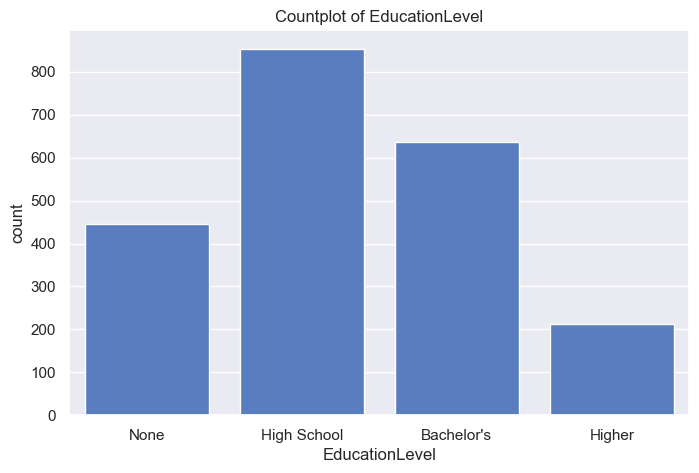

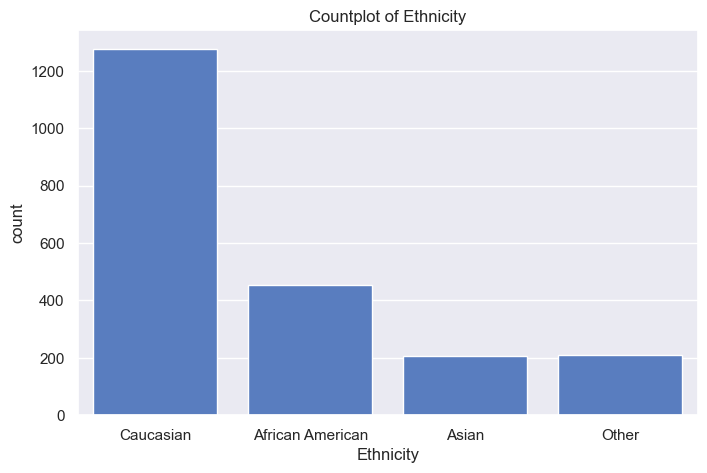

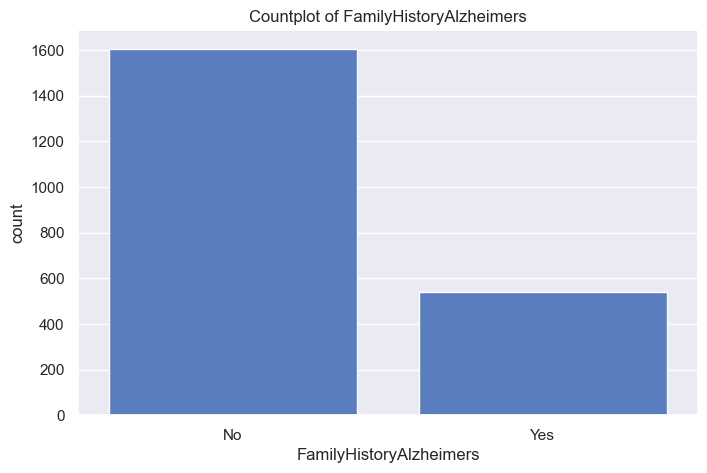

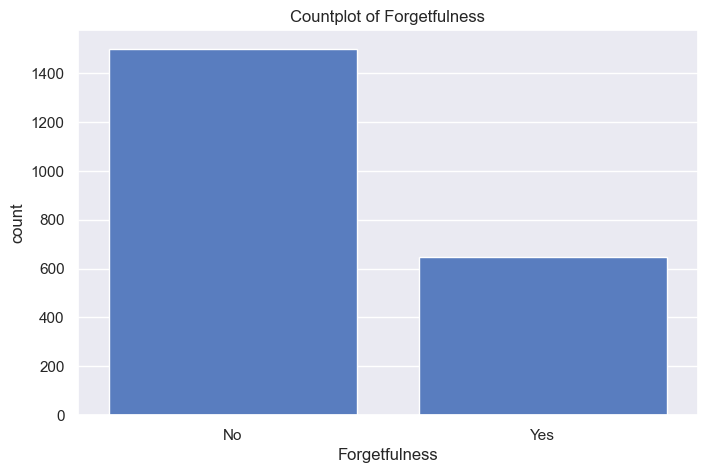

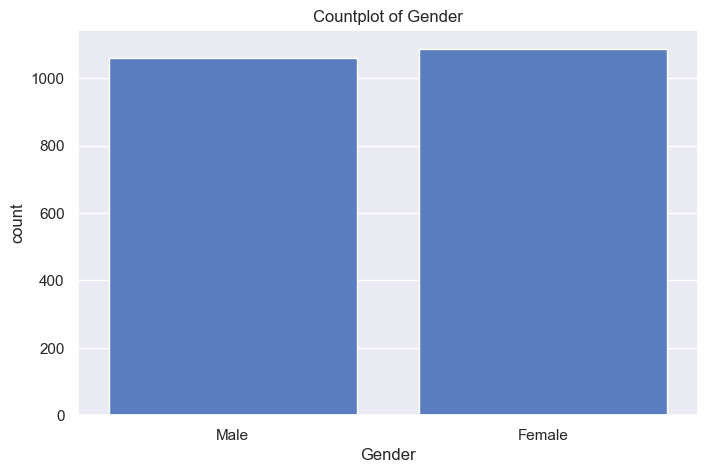

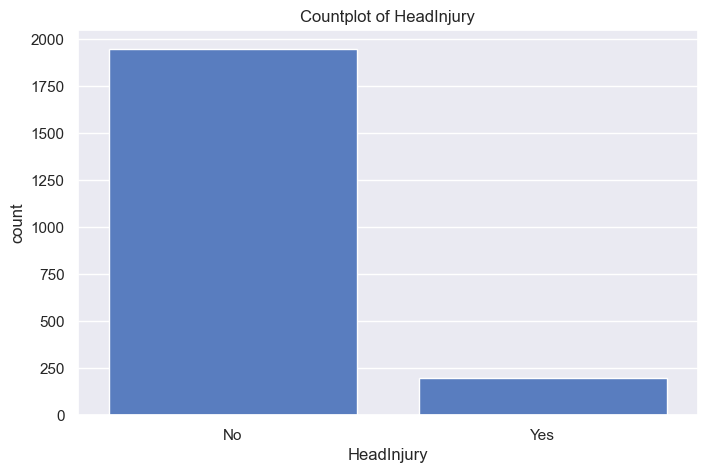

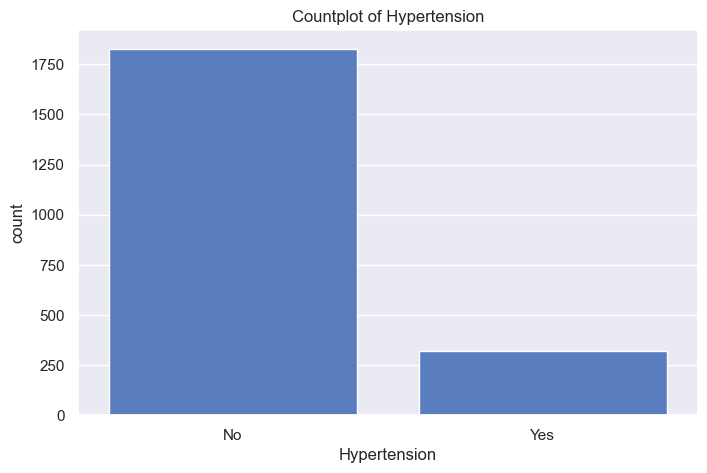

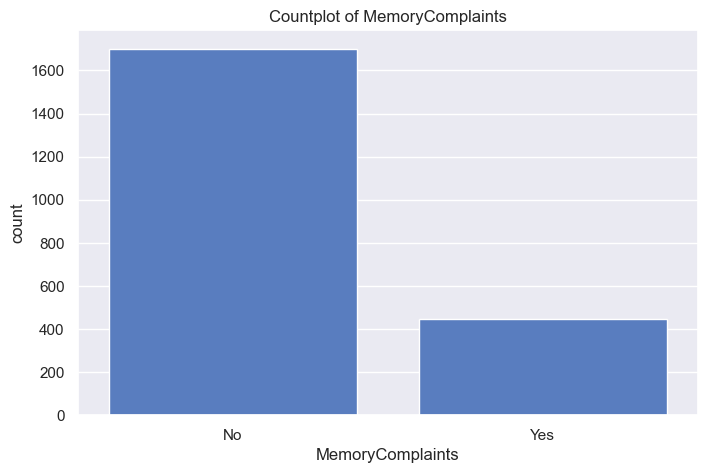

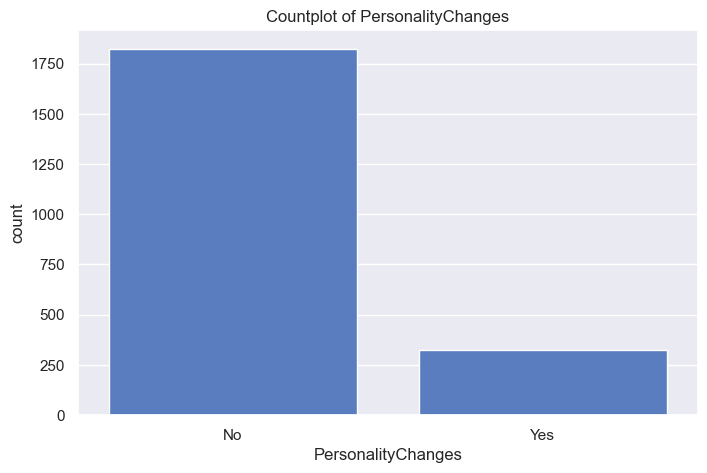

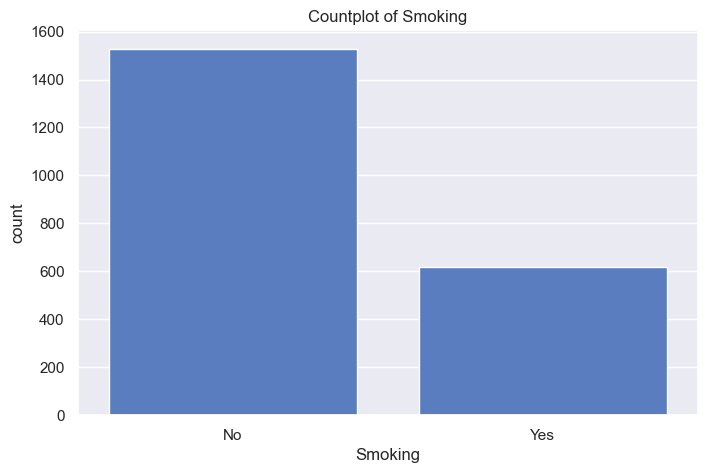

In [13]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

for column in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

In [14]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   float64 
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

In [16]:
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

## Lojistik Regresyon

In [16]:
loj = LogisticRegression()
loj_model = loj.fit(X=X_train, y=y_train)
loj_model

LogisticRegression()

In [17]:
y_pred = loj_model.predict(X_test)

In [18]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[248,  29],
       [ 44, 109]], dtype=int64)

In [19]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



# KNN

In [20]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X=X_train, y=y_train)
knn_model

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.7232558139534884

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       277
           1       0.66      0.46      0.54       153

    accuracy                           0.72       430
   macro avg       0.70      0.67      0.67       430
weighted avg       0.71      0.72      0.71       430



In [24]:
knn_params = {"n_neighbors": np.arange(1,50)}
# Komşu sayıları için olan k değerini 1'den 50'ye kadar deneyeceğiz

In [25]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
print("En iyi skor: ", str(knn_cv.best_score_))
print("En iyi parametreler: ", str(knn_cv.best_params_))

En iyi skor:  0.7725146198830409
En iyi parametreler:  {'n_neighbors': 29}


In [27]:
knn = KNeighborsClassifier(29)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned

KNeighborsClassifier(n_neighbors=29)

In [28]:
knn_tuned.score(X_test, y_test)

0.7558139534883721

In [29]:
y_pred = knn_tuned.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.7558139534883721

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       277
           1       0.82      0.40      0.54       153

    accuracy                           0.76       430
   macro avg       0.78      0.68      0.69       430
weighted avg       0.77      0.76      0.73       430



# CART

In [32]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [33]:
cart_model

DecisionTreeClassifier()

In [34]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8976744186046511

In [35]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [36]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs= -1, verbose= 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [37]:
print("En iyi parametreler:", cart_cv_model.best_params_)

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 6}


In [38]:
cart = DecisionTreeClassifier(max_depth=5, min_samples_split=6)
cart_tuned = cart.fit(X_train, y_train)

In [39]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9302325581395349

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       277
           1       0.93      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



# Random Forests

In [41]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [42]:
rf_model

RandomForestClassifier()

In [43]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9232558139534883

In [44]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [45]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs= -1, verbose= 2)

In [46]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [47]:
print("En iyi parametreler:", rf_cv_model.best_params_)

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [48]:
rf_tuned = RandomForestClassifier(max_depth=10,
                                  max_features=8,
                                  n_estimators=1000,
                                  min_samples_split=5)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [49]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9511627906976744

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



# Gradient Boosting Machines

In [51]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [52]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.958139534883721

In [53]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [54]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [55]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [56]:
print("En iyi parametreler:", gbm_cv.best_params_)

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
gbm = GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=100,
                                 max_depth=3,
                                 min_samples_split=2)
gbm_tuned = gbm.fit(X_train, y_train)

In [58]:
y_pred = gbm_tuned.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.958139534883721

# Yapay Sinir Ağları

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [63]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8093023255813954

In [64]:
mlpc

MLPClassifier()

In [65]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [66]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs= -1, verbose=2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [67]:
print("En iyi parametreler:", mlpc_cv_model.best_params_)

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [73]:
mlpc_tuned = MLPClassifier(activation = "logistic",
                           alpha = 0.01,
                           hidden_layer_sizes = (10, 10, 10),
                           solver = "adam")

In [74]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.01,
              hidden_layer_sizes=(10, 10, 10))

In [75]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8325581395348837

# Tüm Modellerin Karşılaştırılması

In [76]:
modeller = [
    loj_model,
    knn_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    mlpc_tuned
]

for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 83.0233%
----------------------------
KNeighborsClassifier:
Accuracy: 75.5814%
----------------------------
DecisionTreeClassifier:
Accuracy: 93.0233%
----------------------------
RandomForestClassifier:
Accuracy: 95.1163%
----------------------------
GradientBoostingClassifier:
Accuracy: 95.8140%
----------------------------
MLPClassifier:
Accuracy: 83.2558%


In [77]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    